Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Smruti Rao"
COLLABORATORS = ""

---

1. Load the Datset

In [2]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

print("First five rows:")
print(df.head())

print("Missing values in the datas:")
print(df.isnull().sum())

print("Statistics for numeric columns:")
print(df.describe())

First five rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

2. Normalize Data (specifically amount and time)

In [3]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
df['normalized_amount'] = normalizer.fit_transform(df[['Amount']])
df['normalized_time'] = normalizer.fit_transform(df[['Time']])

df = df.drop(['Amount', 'Time'], axis=1)

print("Dataset after normalizing Amount and Time:")
print(df.head())

Dataset after normalizing Amount and Time:
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27    

In [4]:
print("Missing values in 'Class':", df['Class'].isnull().sum())
print("Unique values in 'Class':", df['Class'].unique())

Missing values in 'Class': 0
Unique values in 'Class': [0 1]


3. Split the Data (trianing vs testing sets)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Class distribution in the training set:")
print(y_train.value_counts())

Class distribution in the training set:
Class
0    227451
1       394
Name: count, dtype: int64


4. Handle Imbalance Data with SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after applying SMOTE:")
print(y_train_smote.value_counts())

Class distribution after applying SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


5. Logistic Regression  Model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



5a. Logistic Regression  Model - Fine Tuning

In [8]:
# optimize
from sklearn.model_selection import GridSearchCV

parameters_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # different values of regularization strength (smaller values = stronger regularization)
    'class_weight': [None, 'balanced']  # testing with or without automatic balancing of class weights
}

logreg_grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    parameters_grid,
    scoring = 'f1',
    cv=  3,  # 3-fold cross validation
    verbose = 1
)

logreg_grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters from Grid Search:")
print(logreg_grid_search.best_params_)

best_logreg = logreg_grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

print("Fine Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters from Grid Search:
{'C': 1000, 'class_weight': None}
Fine Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



6. Random Forest  Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators = 100,         # of trees
    max_depth = 10,            # the max depth of each tree
    random_state = 42,    
    class_weight = None,
    n_jobs = -1,                # speeds up training, helpful since the dataset is large
    min_samples_split = 5,      # prevent overfitting 
    min_samples_leaf = 2       
)


rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.86      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.93      0.78     56962
weighted avg       1.00      1.00      1.00     56962



7. Stacked Model (Logistic Regression + Random Forest)

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# convert to numpy arrays for faster indexing
X = X.values 
y = y.values 

best_logreg = logreg_grid_search.best_estimator_  # best model from the grid search
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

logreg_preds = np.zeros(len(y))
rf_preds = np.zeros(len(y))

for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    best_logreg.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    logreg_preds[val_idx] = best_logreg.predict(X_val)
    rf_preds[val_idx] = rf_model.predict(X_val)

stacked_features = np.column_stack((logreg_preds, rf_preds))

meta_model = LogisticRegression()
meta_model.fit(stacked_features, y)

final_preds = meta_model.predict(stacked_features)

accuracy = accuracy_score(y, final_preds)
print(f'Accuracy of the stacked model: {accuracy:.4f}')

Accuracy of the stacked model: 0.9996


8. Stacked Model - Classification Report

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print("Stacked Model Classification Report:")
print(classification_report(y, final_preds))

print("Stacked Model Confusion Matrix:")
print(confusion_matrix(y, final_preds))

Stacked Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.95      0.78      0.86       492

    accuracy                           1.00    284807
   macro avg       0.98      0.89      0.93    284807
weighted avg       1.00      1.00      1.00    284807

Stacked Model Confusion Matrix:
[[284295     20]
 [   107    385]]


9. Data Visualization - Heat Map of Stacked Model Confusion Matrix

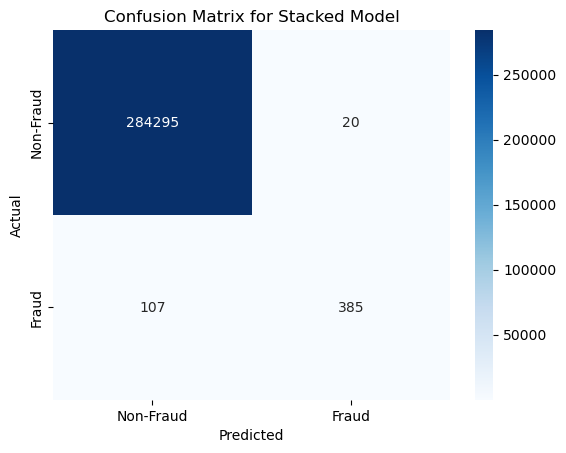

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, final_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix for Stacked Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

10. Evaluate Model on Test Set

In [13]:
from sklearn.metrics import precision_score, recall_score, classification_report

X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

logreg_test_preds = best_logreg.predict(X_test_array)
rf_test_preds = rf_model.predict(X_test_array)

stacked_test_features = np.column_stack((logreg_test_preds, rf_test_preds))

final_test_preds = meta_model.predict(stacked_test_features)

precision = precision_score(y_test, final_test_preds)
recall = recall_score(y_test, final_test_preds)


print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")

# success criteria
if recall > 0.70 and precision > 0.80:
    print("Success")
else:
    print("Failure")

Precision: 97.83%
Recall: 91.84%
Success


11. Database Connection

In [14]:
import sqlite3

# connect to SQLite 
conn = sqlite3.connect('fraud_detection.db')
cursor = conn.cursor()

12. Create Tables (Transaction + Predictions)

In [15]:
# Transactions table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Transactions (
    ID INTEGER PRIMARY KEY,
    Time REAL,
    Amount REAL,
    V1 REAL, V2 REAL, V3 REAL, V4 REAL, V5 REAL, V6 REAL, V7 REAL, V8 REAL, V9 REAL, V10 REAL, 
    V11 REAL, V12 REAL, V13 REAL, V14 REAL, V15 REAL, V16 REAL, V17 REAL, V18 REAL, V19 REAL, 
    V20 REAL, V21 REAL, V22 REAL, V23 REAL, V24 REAL, V25 REAL, V26 REAL, V27 REAL, V28 REAL,
    Class INTEGER
)
''')

# Predictions table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Predictions (
    Transaction_ID INTEGER,
    Predicted_Class INTEGER,
    Model_Type TEXT,
    Prediction_Date TEXT,
    FOREIGN KEY(Transaction_ID) REFERENCES Transactions(ID)
)
''')

print("Tables created")

In [21]:
cursor.execute('''
ALTER TABLE Transactions ADD COLUMN Normalized_Amount REAL;
''')

cursor.execute('''
ALTER TABLE Transactions ADD COLUMN Normalized_Time REAL;
''')

In [33]:
cursor.execute("PRAGMA foreign_keys=off")  
cursor.execute("CREATE TABLE Transactions_new AS SELECT V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Class, normalized_amount, normalized_time FROM Transactions")
cursor.execute("DROP TABLE Transactions") 
cursor.execute("ALTER TABLE Transactions_new RENAME TO Transactions") 
cursor.execute("PRAGMA foreign_keys=on")  

In [43]:
transaction_data = []

for i, row in df.iterrows():
    values = row[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
                  'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
                  'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 
                  'normalized_amount', 'normalized_time']].values
    values_to_insert.append(tuple(values))

cursor.executemany('''
    INSERT INTO Transactions (V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, 
                             V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, 
                             V24, V25, V26, V27, V28, Class, Normalized_Amount, Normalized_Time)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, 
            ?, ?, ?, ?, ?, ?, ?, ?)
''', transaction_data)

conn.commit()

In [44]:
cursor.execute("SELECT COUNT(*) FROM Transactions")
print(cursor.fetchone()[0])  # prints the number of rows inserted

658598


In [16]:
import datetime

prediction_data = []
for idx, pred in enumerate(final_test_preds): 
    prediction_data.append((
        idx,                     
        int(pred),                
        'StackedModel',           
        datetime.datetime.now()   
    ))

cursor.executemany('''
    INSERT INTO Predictions (Transaction_ID, Predicted_Class, Model_Type, Prediction_Date)
    VALUES (?, ?, ?, ?)
''', prediction_data)
conn.commit()
print(f"{len(prediction_data)} predictions inserted into the database.")

/tmp/ipykernel_2130546/1292926064.py:14: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  cursor.executemany('''


56962 predictions inserted into the database.


In [20]:
cursor.execute("SELECT * FROM Predictions WHERE Predicted_Class = 1")
fraud_predictions = cursor.fetchall()
print(f"Number of fraud predictions: {len(fraud_predictions)}")

Number of fraud predictions: 92


In [20]:
cursor.execute('''
    SELECT zized_Amount), COUNT(*)
    FROM Transactions
    WHERE Class = 1
    GROUP BY (V1 > 0)
''')
results = cursor.fetchall()
print(results)

[(0.2240853499584882, 943), (-0.2317860353428663, 255)]
